# Caso Práctico de Módulo 2: Clasificación de Tweets en Español (Análisis de Sentimientos)

* En el siguiente ejercicio tiene como objetivo aplicar los conocimientos vistos hasta el momento de:
    - Normalización de textos (procesamiento de textos)
    - Clasificación de textos
    
    
* El ejercicio consiste en clasificar una serie de tweets en Español que estan clasificados como '***positivos***', '***neutros***', '***negativos***' o '***None***' (desconocido), aunque solo vamos a trabajar con los tweets clasificados correctamente (los no desconocidos).


* Para este ejercicio se pide realizar todo el proceso de clasificación visto hasta el momento:
    1. Carga de los datos (ya implementado en el ejercicio)
    2. Normalización de los tweets
    3. Creacción de la Bolsa de Palabras de frecuencias
    4. Particionado de Datos
    5. Creacción de modelos
    6. Evaluación de los modelos



<hr>


## Carga de Datos


* El primer paso que vamos a realizar es el de cargar los datos. 


* Estos datos estan en un archivo con extensión '*txt*' pero tienen estructura de '*csv*' y tienen como separador '***::::***'.


* Este fichero lo podemos leer como un '*csv*' con pandas, estructurándolo de la siguiente manera:
    - **Posición 0**: Tweet
    - **Posición 1**: Sentimiento (Positivo | Neutro | Negativo)
    
    
* Los tweets estan clasificados con 4 etiquetas, pero vamos a trabajar solo con los tweets que sean '***positivos***', '***neutros***' o '***negativos***'.

In [1]:
import pandas as pd
tweets_file = 'tweets_castellano.txt'
df = pd.read_csv(tweets_file, sep="::::", names=['tweet','sentimiento'] ,engine='python')
df = df[df['sentimiento'].isin(['positivo', 'neutro', 'negativo'])]
tweets = [tuple(x) for x in df.values]
print('Número de Tweets Cargados: {num}'.format(num=len(tweets)))
df.head(5)

Número de Tweets Cargados: 5735


,tweet,sentimiento
1,@PauladeLasHeras No te libraras de ayudar me/n...,neutro
2,@marodriguezb Gracias MAR,positivo
3,"Off pensando en el regalito Sinde, la que se v...",negativo
4,Conozco a alguien q es adicto al drama! Ja ja ...,positivo
6,Toca @crackoviadeTV3 . Grabación dl especial N...,positivo


<hr>


## Normalización



In [2]:
# Usaremos Spacy para normalizar
import spacy
nlp = spacy.load('es_core_news_sm')

# Divido los datos en dos listas 
#     X: los tweets
#     y: target (polaridad)

X = [doc[0] for doc in tweets]
y = [doc[1] for doc in tweets]

def normalize(sentenses):
    """normalizamos la lista de frases y devolvemos la misma lista de frases normalizada"""
    for index, sentense in enumerate(sentenses):
        sentense = nlp(sentense.lower()) # Paso la frase a minúsculas y a un objeto de la clase Doc de Spacy
        sentenses[index] = " ".join([word.lemma_ for word in sentense if (not word.is_punct)
                                     and (len(word.text) > 2) and (not word.is_stop) 
                                     and (not word.text.startswith('http'))])
    return sentenses

# Normalizamos las frases
X = normalize(X)

In [3]:
print (X)

['@pauladelashera librarar ayudar beso gracia', '@marodriguezb gracias mar', 'off pensar regalito sinde sgae corrupto intentar sacar conclusión intentar', 'conocer alguien adicto drama sonar', 'tocar @crackoviadetv3 grabación especial navideño mari crismas', 'mandar abrazo miguel familia @libertadmont grandeza humano', 'escaño listo empezar endiascomohoy congreso', 'bdía ira puente dejeis tableta orbyt momento decir', 'sistema económico recortar dinero prestación social refuerza billón euros banco necesitar repensar él', 'programascambiado caca ajuste', 'viernes', '@adri_22_22 programascambiado gracias @carlos_latre gracias rato amigo', 'universidad confíar calle encarar reto ambicioso', 'ayudáis indultoneirir zapatero sugerencia consejo ministro', 'abcdesevilla.es recio indicio potente denunciar responsable ere', 'abcdesevilla.es alto cargo empleo denunciado retirar prejubilación extrabajador', 'marcha atrás posponer devolución ccaa resbalón deber asumir fallo mentir decir conocer cue

<hr>


## Bolsa de Palabras de Frecuencias



In [4]:
#utilizaremos la técnica de vectores de frequencia
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=3)
# Pasamos los tweets normalizados a Bolsa de palabras
X = vectorizer.fit_transform(X)


In [11]:
# Resultados
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<hr>


## Particionado de Datos (Train y Test)

* Particionar los datos en conjunto de Train y Test de la siguiente manera:
    - 80% de datos de entrenamiento
    - 20% de datos de test


In [6]:

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Número de Tweets para el entrenamiento: {num}'.format(num=X_train.shape[0]))
print('Número de Tweets para el test: {num}'.format(num=X_test.shape[0]))

Número de Tweets para el entrenamiento: 4588
Número de Tweets para el test: 1147


<hr>


## Creacción del Modelo


In [7]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
svm_lin = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
rf = RandomForestClassifier(n_estimators=200, bootstrap=True, criterion='gini', max_depth=50, random_state=0)

clasificadores = {'Multinomial Naive Bayes': mnb,
                  'Bernoulli Naive Bayes': bnb,
                  'Regresion Logistica': lr,
                  'SVM lineal': svm_lin,
                  'SVM rbf': svm_rbf,
                  'Random Forest': rf}


# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X_train, y_train)
    accuracy_train = v.score(X_train, y_train)
    print ('\tAccuracy Train: {acc_train}'.format(acc_train=accuracy_train)) 

CREANDO MODELO: Multinomial Naive Bayes
	Accuracy Train: 0.765693112467306
CREANDO MODELO: Bernoulli Naive Bayes
	Accuracy Train: 0.7541412380122058
CREANDO MODELO: Regresion Logistica
	Accuracy Train: 0.8308631211857018
CREANDO MODELO: SVM lineal
	Accuracy Train: 0.8428509154315605
CREANDO MODELO: SVM rbf
	Accuracy Train: 0.8709677419354839
CREANDO MODELO: Random Forest
	Accuracy Train: 0.7748474280732345


<hr>


## Evaluación del Modelo



Para cada uno de los modelos vamos a calcular las siguientes métricas de evaluación:
 1. Accuracy
 2. Precision
 3. Recall
 4. F1


In [13]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

def evaluation(model, name, X_train, y_train, X_test, y_test):
    """
    Función de devuelve en un diccionario las métricas de evaluación de 
    Accuracy, Precision, Recall y F1 para los conjuntos de datos de entrenamiento y test
        model: modelo a evaluar
        name: nombre del modelo
        X_train: Variables de entrada del conjunto de datos de entrenamiento
        y_train: Variable de salida del conjunto de datos de entrenamiento
        X_test: Variables de entrada del conjunto de datos de test
        y_test: Variable de salida del conjunto de datos de test
        return: diccionario con el nombre del modelo y el valor de las métricas
    """
    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    
    return model_dict


# Calculamos las métricas de los modelos por separado
evaluacion = list()
for key, model in clasificadores.items():
    evaluacion.append(evaluation(model=model, name=key, 
                                 X_train=X_train, y_train=y_train,
                                 X_test=X_test, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
results = pd.DataFrame.from_dict(evaluacion)
results.set_index("name", inplace=True)
results

,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests
name,,,,,,,,
Multinomial Naive Bayes,0.765693,0.684394,0.761728,0.661855,0.765693,0.684394,0.755981,0.668788
Bernoulli Naive Bayes,0.754141,0.671316,0.748587,0.641260,0.754141,0.671316,0.740180,0.649970
Regresion Logistica,0.830863,0.646905,0.833968,0.621079,0.830863,0.646905,0.821512,0.629090
SVM lineal,0.842851,0.635571,0.848417,0.615284,0.842851,0.635571,0.835555,0.623080
SVM rbf,0.870968,0.665214,0.883559,0.592368,0.870968,0.665214,0.857672,0.624893
Random Forest,0.774847,0.632084,0.834916,0.567602,0.774847,0.632084,0.754402,0.584552


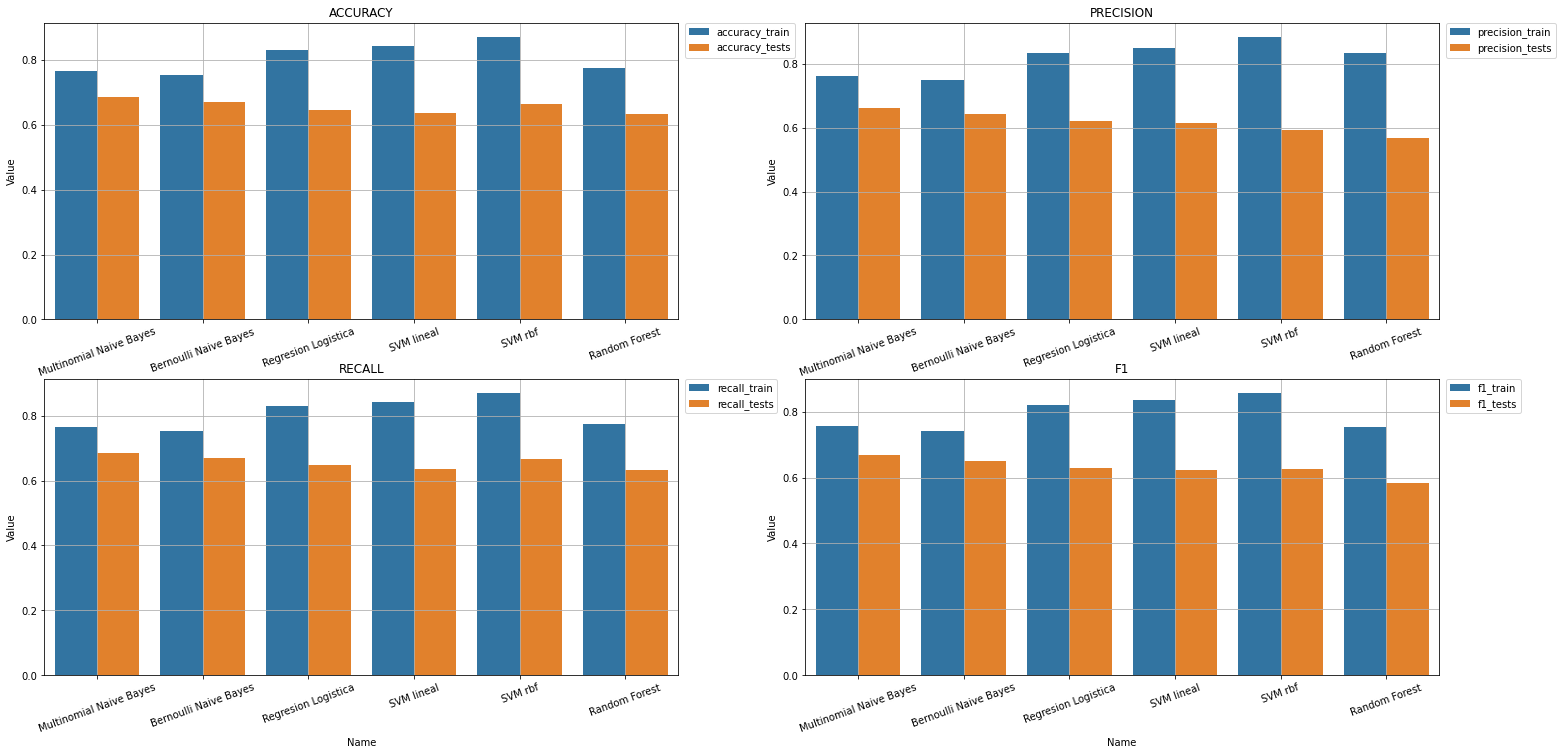

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Métricas a pintar
METRICS = ["accuracy", "precision", "recall", "f1"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = results.reset_index().melt(id_vars='name').rename(columns=str.title)

plt.figure(figsize=(25, 12))
pos = 1
for metric in METRICS:
    # Filtramos la métrica a pintar
    df_aux = df_plot[df_plot['Variable'].str.contains(metric)]
    
    # Pintamos la gráfica en su posición 2x2
    plt.subplot(2, 2, pos)
    sns.barplot(x='Name', y='Value', hue='Variable', data=df_aux)
    plt.title(metric.upper())
    plt.grid()
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=20)
    pos += 1
plt.show()

<h3> Ploteamos matrices de confusión

Obteniendo Matriz de Confusión de: Multinomial Naive Bayes
Obteniendo Matriz de Confusión de: Bernoulli Naive Bayes
Obteniendo Matriz de Confusión de: Regresion Logistica
Obteniendo Matriz de Confusión de: SVM lineal
Obteniendo Matriz de Confusión de: SVM rbf
Obteniendo Matriz de Confusión de: Random Forest


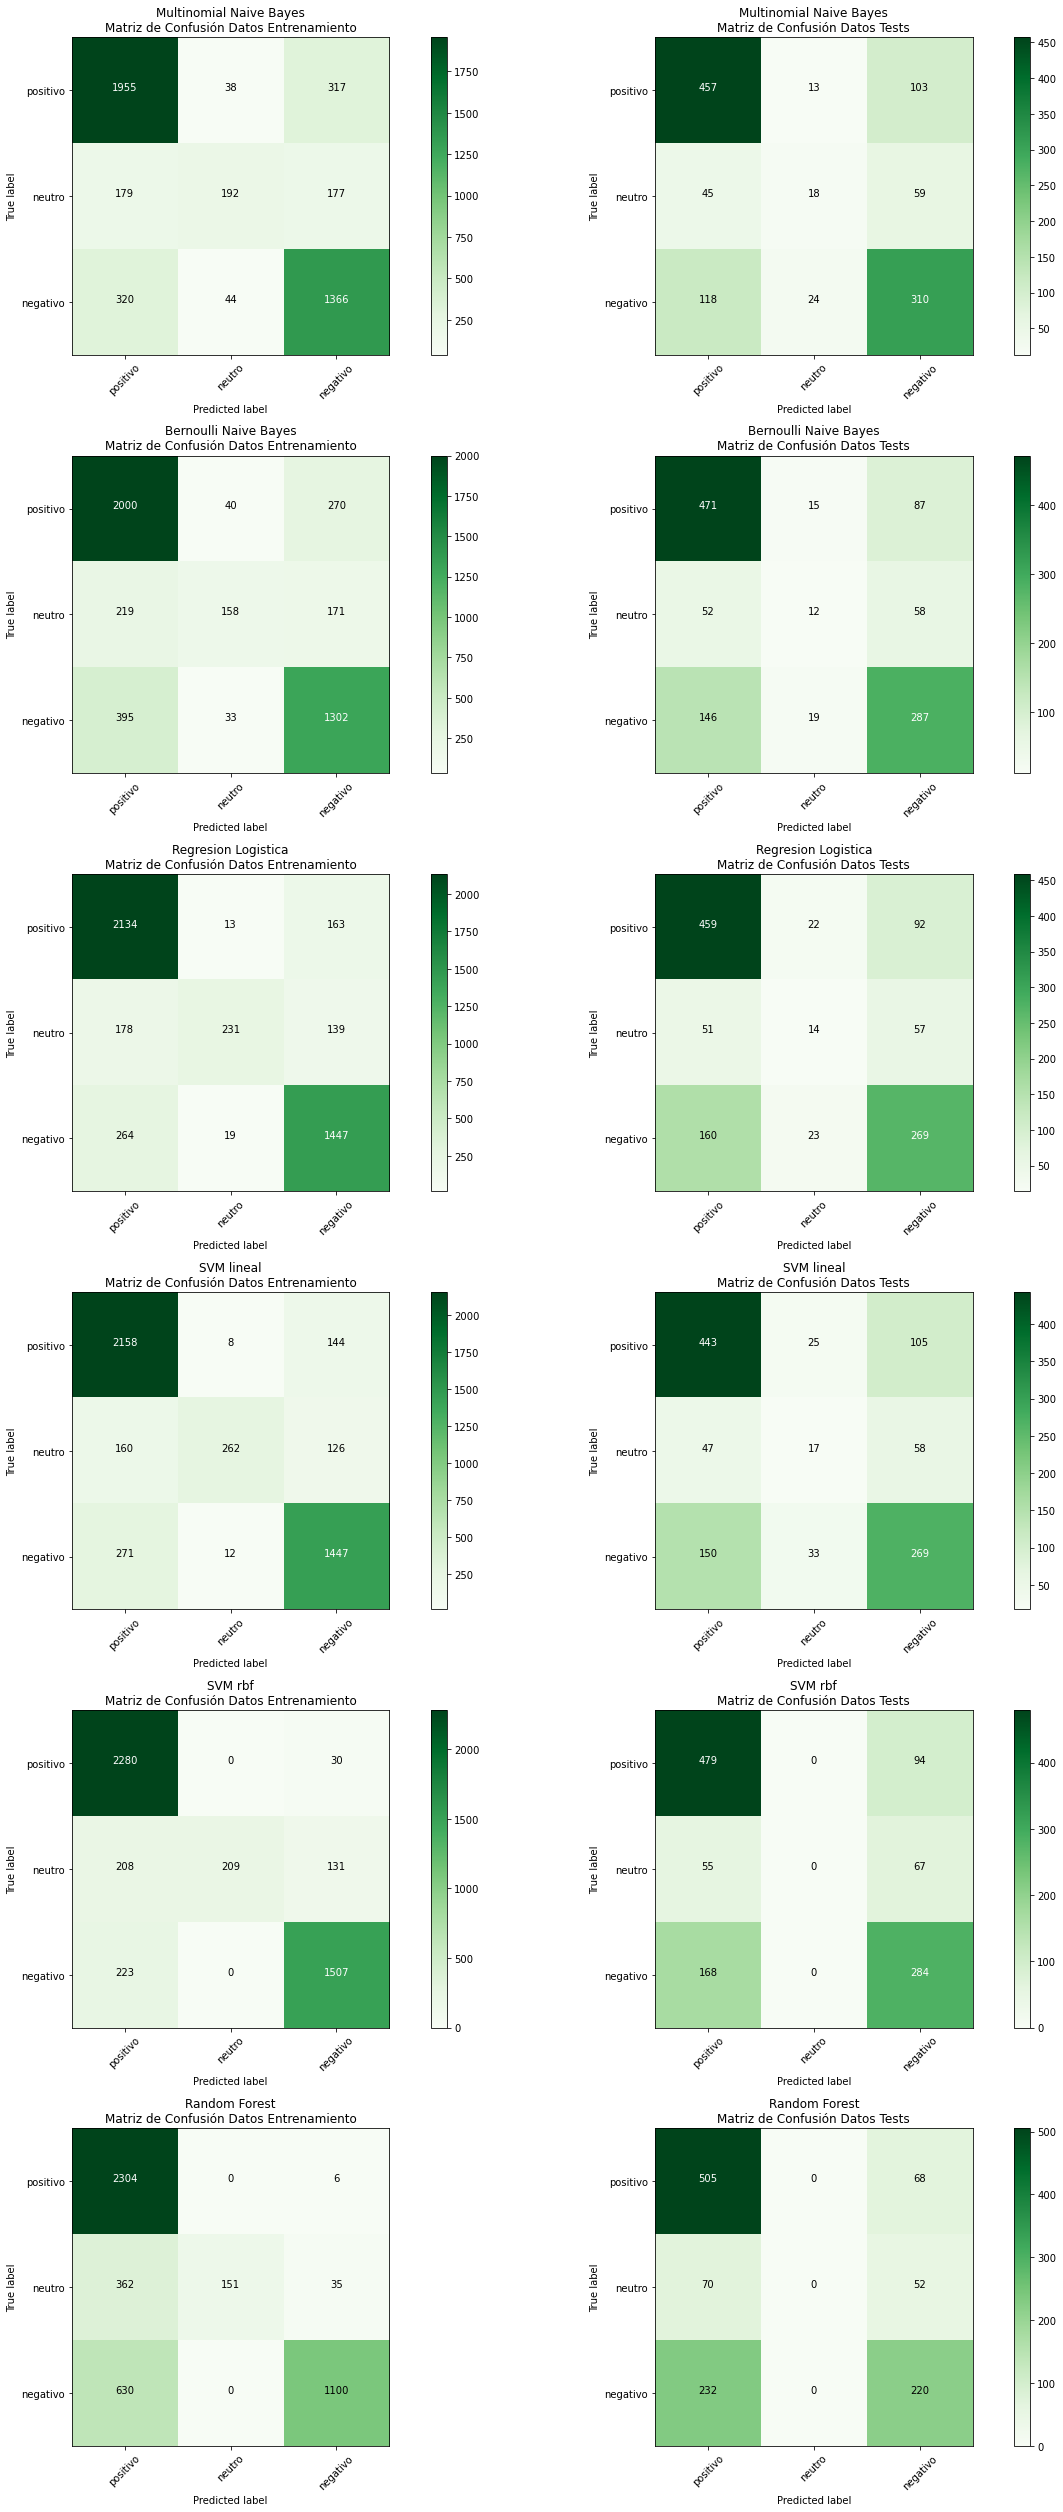

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from sklearn.metrics import confusion_matrix

polaridad = ['positivo', 'neutro', 'negativo']

# Obtenemos las Matrices de confusión
msc = list()
for k, v in clasificadores.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train, labels=polaridad)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test, labels=polaridad)
    msc.append(model)

    
# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Pintamos las matrices de confusión
plt.figure(figsize=(20, 35))
pos = 0
for mc in msc:
    pos += 1
    plt.subplot(6, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=polaridad, 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    pos += 1
    plt.subplot(6, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=polaridad, 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()

En las matrices de confusión,se puede observar en qué clase clasifica los tuits (predicted label) en
función de la clase a la que pertenecen (true label). Los modelos Random forest, son los que peor resultado presentan, observese que la clasificación para la clase negativos no es muy precisa.
El resto de modelos presentan buenos resultados,  la clasificación de los verdaderos positivos y verdaderos negativos es bastante buena y el error cometido es bajo.